Урок 7.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату 
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 
Произвести расчет как с использованием intercept, так и без.


444.17735732435955 2.6205388824027653


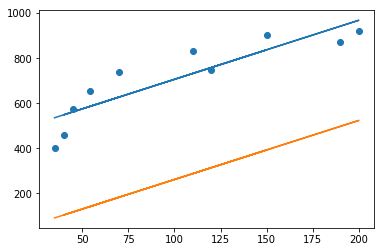

In [41]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
xm,ym = np.mean(x),np.mean(y)
nom   = len(x)*sum(x*y) - sum(x)*sum(y)
denom = len(x)*sum(x*x) - sum(x)**2
b = nom/denom
a = ym - b*xm
print(a,b)
y_hat = a + b*x
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.plot(x,x*b)
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

0 0.2994101 608840.7921023312
100 5.72182291853623 71132.09701156412
200 5.884771924776093 70646.51193016312
300 5.889668707725519 70646.07341601331
400 5.88981586102094 70646.0730200072
500 5.889820283126758 70646.07301964959
600 5.889820416015521 70646.07301964927
700 5.889820420008965 70646.07301964925
800 5.889820420128973 70646.07301964927
900 5.889820420132577 70646.07301964925
1000 5.8898204201326765 70646.07301964927
1100 5.8898204201326765 70646.07301964927
1200 5.8898204201326765 70646.07301964927
1300 5.8898204201326765 70646.07301964927
1400 5.8898204201326765 70646.07301964927
1500 5.8898204201326765 70646.07301964927
1600 5.8898204201326765 70646.07301964927
1700 5.8898204201326765 70646.07301964927
1800 5.8898204201326765 70646.07301964927
1900 5.8898204201326765 70646.07301964927
2000 5.8898204201326765 70646.07301964927


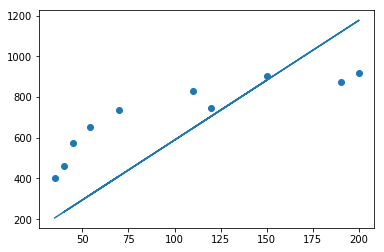

In [34]:
# mse = np.sum((y-bi*x-ai)**2)/n
def mse_(ai,bi,x=x,y=y,n=8):
    return np.sum((ai+bi*x - y)**2)/n

ai,bi,n,alp = 0.0, 0.1, 8,1.e-6
M,Mi= 2001,100
for i in range(M):
    bi = bi - alp*2*np.sum((ai+bi*x - y)*x)/n
    if i%Mi==0: print(i,bi,mse_(ai,bi))
        
y_hat = ai + bi*x
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.show()

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений 
функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [27]:
#Функция Лапласа (нормальное распределение) используется при полагающейся известной дисперсии генеральной совокупности, 
#распределение Стьюдента - когда стоит вопрос о поиске среднего, а дисперсия не известна - надо оценивать. 

4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться 
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной 
итерации). 

0 0.17494 0.11994101 643645.6989764002
50000 424.233583827859 2.7699382758595545 8214.25512381541
100000 443.1895756342734 2.627938384076433 8088.327418682004
150000 444.12843415205015 2.6209053673245015 8088.0185111015035
200000 444.17493424159346 2.620557033786987 8088.017753334243
250000 444.1772373131284 2.6205397814104257 8088.017751475396
300000 444.17735138040376 2.6205389269291124 8088.0177514708375
350000 444.17735702996464 2.620538884608086 8088.017751470823
400000 444.1773573097653 2.6205388825121383 8088.017751470824
450000 444.17735732358915 2.6205388824085007 8088.017751470823
500000 444.1773573238859 2.6205388824063163 8088.0177514708275
550000 444.1773573238859 2.6205388824063163 8088.0177514708275
600000 444.1773573238859 2.6205388824063163 8088.0177514708275


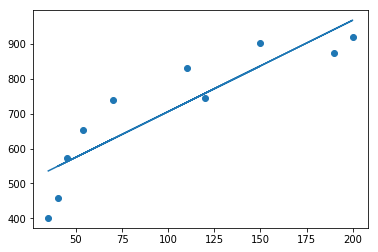

In [48]:
ai,bi,n,alp_a,alp_b = 0.0, 0.1, 8,1.e-4,1.0e-7
M,Mi= 600001,50000
for i in range(M):
    ai_new = ai - alp_a*2*np.sum((ai+bi*x - y))/n
    bi_new = bi - alp_b*2*np.sum((ai+bi*x - y)*x)/n
    ai,bi = ai_new,bi_new
    if i%Mi==0: print(i,ai,bi,mse_(ai,bi))
        
y_hat = ai + bi*x
plt.scatter(x,y)
plt.plot(x,y_hat)
plt.show()

In [44]:
print(a,b)

444.17735732435955 2.6205388824027653
